![](img/image_.png)

# Задание

### Провести исследование на имеющихся данных с листа DATA.

Предполагается, что целевые признаки для бизнеса - это величина годовой премии и срок действия полиса.

Среди данных планируется выявить переменные, влияющие на целевые признаки, или параметры при которых они максимальные.

### Гипотезы

* У клиентов, использующих кредитные карты, меньше срок страхования и премия.
* Среди филиалов есть такие, в которых у клиентов, в среднем, наибольший срок действия полиса и размер премии.
* Клиенты женского пола чаще приобретают семейные планы.
* Есть клиентские сегменты, в среднем, с наибольший сроком действия полиса и размером премии.
* Клиенты определенного возраста владеют, в среднем, полисом с наибольшим сроком действия и размером премии.
* При помощи машинного обучения на данном наборе признаков можно прогнозировать период действия полиса и премию.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('task_2_pd.xlsx')
data = data.drop(['Start_of_policy', 'End_of_policy', 'End_of_contract'], axis=1)
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,Расторгнут автоматически,Мужской,1961.0,Индивидуальный платиновый план,364,5880,DC,Unidentified,NSK
1,Расторгнут автоматически,Мужской,1959.0,Семейный серебряный план,364,4200,DC,Mass,NSK
2,Расторгнут автоматически,Мужской,1974.0,Индивидуальный платиновый план,364,5880,DC,Mass,EKT
3,Расторгнут автоматически,Женский,1966.0,Индивидуальный платиновый план,408,5880,DC,Unidentified,NNV
4,Расторгнут автоматически,Мужской,1977.0,Индивидуальный платиновый план,347,5880,DC,Mass Affluent,EKT
...,...,...,...,...,...,...,...,...,...
34397,Действующий,Мужской,1985.0,Индивидуальный платиновый план,364,5880,DC,Mass,NSK
34398,Действующий,Мужской,1991.0,Семейный расширенный золотой план,364,8280,DC,Unidentified,NSK
34399,Действующий,Мужской,1969.0,Индивидуальный серебряный план,364,3000,DC,Mass,EKT
34400,Действующий,Женский,1989.0,Индивидуальный платиновый план,364,5880,CC,Mass,RBA


Статус - Статус договора на сегодня. Расторгнут (не важно по какой причине) = не действующий.

Программа - Программа страхования, которую приобрел клиент + наименование тарифа.

Дата начала ответственности - Дата начала действия полиса.

Дата окончания ответственности - Дата окончания действия полиса.

Дата расторжения - Дата, с которой договор прекратил действие.

Премия - Годовая сумма взноса от клиента.

Тип карты для списания - DC - дебетовая карта. CC - кредитная карта.

Сегмент клиента - Сегмент клиента, согласно сегментации Банка. Если Unidentified, то это новый клиент Банка и ему ещё не успели присвоить сегмент.

Регион отделения - Регион отделения Банка, к которому прикреплен клиент.

In [3]:
# Уберем пропуски

data = data.dropna()
data.isnull().sum()

Status                    0
Sex                       0
Year_of_birth             0
Programm                  0
Policy_validity_period    0
Premium                   0
Card_type                 0
Client_segment            0
Branch_region             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34380 entries, 0 to 34401
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Status                  34380 non-null  object 
 1   Sex                     34380 non-null  object 
 2   Year_of_birth           34380 non-null  float64
 3   Programm                34380 non-null  object 
 4   Policy_validity_period  34380 non-null  int64  
 5   Premium                 34380 non-null  int64  
 6   Card_type               34380 non-null  object 
 7   Client_segment          34380 non-null  object 
 8   Branch_region           34380 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.6+ MB


In [5]:
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,Расторгнут автоматически,Мужской,1961.0,Индивидуальный платиновый план,364,5880,DC,Unidentified,NSK
1,Расторгнут автоматически,Мужской,1959.0,Семейный серебряный план,364,4200,DC,Mass,NSK
2,Расторгнут автоматически,Мужской,1974.0,Индивидуальный платиновый план,364,5880,DC,Mass,EKT
3,Расторгнут автоматически,Женский,1966.0,Индивидуальный платиновый план,408,5880,DC,Unidentified,NNV
4,Расторгнут автоматически,Мужской,1977.0,Индивидуальный платиновый план,347,5880,DC,Mass Affluent,EKT
...,...,...,...,...,...,...,...,...,...
34397,Действующий,Мужской,1985.0,Индивидуальный платиновый план,364,5880,DC,Mass,NSK
34398,Действующий,Мужской,1991.0,Семейный расширенный золотой план,364,8280,DC,Unidentified,NSK
34399,Действующий,Мужской,1969.0,Индивидуальный серебряный план,364,3000,DC,Mass,EKT
34400,Действующий,Женский,1989.0,Индивидуальный платиновый план,364,5880,CC,Mass,RBA


In [6]:
data.Status.unique()

array(['Расторгнут автоматически', 'Действующий',
       'Расторгнут по заявлению'], dtype=object)

Перекодируем категориальные переменные

In [7]:
status_dictionary = {'Действующий': 1, 'Расторгнут автоматически': 0, 'Расторгнут по заявлению': 0}

In [8]:
data['Status'] = data['Status'].apply(lambda x: status_dictionary[x])
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,0,Мужской,1961.0,Индивидуальный платиновый план,364,5880,DC,Unidentified,NSK
1,0,Мужской,1959.0,Семейный серебряный план,364,4200,DC,Mass,NSK
2,0,Мужской,1974.0,Индивидуальный платиновый план,364,5880,DC,Mass,EKT
3,0,Женский,1966.0,Индивидуальный платиновый план,408,5880,DC,Unidentified,NNV
4,0,Мужской,1977.0,Индивидуальный платиновый план,347,5880,DC,Mass Affluent,EKT
...,...,...,...,...,...,...,...,...,...
34397,1,Мужской,1985.0,Индивидуальный платиновый план,364,5880,DC,Mass,NSK
34398,1,Мужской,1991.0,Семейный расширенный золотой план,364,8280,DC,Unidentified,NSK
34399,1,Мужской,1969.0,Индивидуальный серебряный план,364,3000,DC,Mass,EKT
34400,1,Женский,1989.0,Индивидуальный платиновый план,364,5880,CC,Mass,RBA


In [9]:
sex_dictionary = {'Женский': 0, 'Мужской': 1}

In [10]:
data['Sex'] = data['Sex'].apply(lambda x: sex_dictionary[x])
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,0,1,1961.0,Индивидуальный платиновый план,364,5880,DC,Unidentified,NSK
1,0,1,1959.0,Семейный серебряный план,364,4200,DC,Mass,NSK
2,0,1,1974.0,Индивидуальный платиновый план,364,5880,DC,Mass,EKT
3,0,0,1966.0,Индивидуальный платиновый план,408,5880,DC,Unidentified,NNV
4,0,1,1977.0,Индивидуальный платиновый план,347,5880,DC,Mass Affluent,EKT
...,...,...,...,...,...,...,...,...,...
34397,1,1,1985.0,Индивидуальный платиновый план,364,5880,DC,Mass,NSK
34398,1,1,1991.0,Семейный расширенный золотой план,364,8280,DC,Unidentified,NSK
34399,1,1,1969.0,Индивидуальный серебряный план,364,3000,DC,Mass,EKT
34400,1,0,1989.0,Индивидуальный платиновый план,364,5880,CC,Mass,RBA


In [11]:
data['Programm'].unique()

array(['Индивидуальный платиновый план', 'Семейный серебряный план',
       'Индивидуальный золотой план', 'Индивидуальный серебряный план',
       'Семейный расширенный золотой план',
       'Семейный расширенный платиновый план',
       'Семейный расширеный серебряный план', 'Семейный платиновый план',
       'Семейный золотой план', 'Семейный расширенный серебряный план',
       'Индивидуальный серебрянный план'], dtype=object)

In [12]:
# Чем дороже план, тем больше цифра. Повторы в категориях закодировал одной и той же цифрой. 

programm_dictionary = {'Индивидуальный серебрянный план': 1, 'Индивидуальный серебряный план': 1,
                       'Семейный серебряный план': 2,
                       'Индивидуальный золотой план': 3,
                       'Семейный расширеный серебряный план': 4, 'Семейный расширенный серебряный план': 4,
                       'Индивидуальный платиновый план': 5,
                       'Семейный золотой план': 6,
                       'Семейный расширенный золотой план': 7,
                       'Семейный платиновый план': 8,
                       'Семейный расширенный платиновый план': 9
                       }

In [13]:
data['Programm'] = data['Programm'].apply(lambda x: programm_dictionary[x])
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,0,1,1961.0,5,364,5880,DC,Unidentified,NSK
1,0,1,1959.0,2,364,4200,DC,Mass,NSK
2,0,1,1974.0,5,364,5880,DC,Mass,EKT
3,0,0,1966.0,5,408,5880,DC,Unidentified,NNV
4,0,1,1977.0,5,347,5880,DC,Mass Affluent,EKT
...,...,...,...,...,...,...,...,...,...
34397,1,1,1985.0,5,364,5880,DC,Mass,NSK
34398,1,1,1991.0,7,364,8280,DC,Unidentified,NSK
34399,1,1,1969.0,1,364,3000,DC,Mass,EKT
34400,1,0,1989.0,5,364,5880,CC,Mass,RBA


In [14]:
data['Card_type'].unique()

array(['DC', 'CC', 'СC'], dtype=object)

In [15]:
card_dictionary = {'DC': 1, 'CC': 0, 'СC': 0}

In [16]:
data['Card_type'] = data['Card_type'].apply(lambda x: card_dictionary[x])
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,0,1,1961.0,5,364,5880,1,Unidentified,NSK
1,0,1,1959.0,2,364,4200,1,Mass,NSK
2,0,1,1974.0,5,364,5880,1,Mass,EKT
3,0,0,1966.0,5,408,5880,1,Unidentified,NNV
4,0,1,1977.0,5,347,5880,1,Mass Affluent,EKT
...,...,...,...,...,...,...,...,...,...
34397,1,1,1985.0,5,364,5880,1,Mass,NSK
34398,1,1,1991.0,7,364,8280,1,Unidentified,NSK
34399,1,1,1969.0,1,364,3000,1,Mass,EKT
34400,1,0,1989.0,5,364,5880,0,Mass,RBA


In [17]:
data['Client_segment'].unique()

array(['Unidentified', 'Mass', 'Mass Affluent', 'Low Mass', 'Affluent', 0],
      dtype=object)

In [18]:
data = data[data['Client_segment'] != 0]
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,0,1,1961.0,5,364,5880,1,Unidentified,NSK
1,0,1,1959.0,2,364,4200,1,Mass,NSK
2,0,1,1974.0,5,364,5880,1,Mass,EKT
3,0,0,1966.0,5,408,5880,1,Unidentified,NNV
4,0,1,1977.0,5,347,5880,1,Mass Affluent,EKT
...,...,...,...,...,...,...,...,...,...
34397,1,1,1985.0,5,364,5880,1,Mass,NSK
34398,1,1,1991.0,7,364,8280,1,Unidentified,NSK
34399,1,1,1969.0,1,364,3000,1,Mass,EKT
34400,1,0,1989.0,5,364,5880,0,Mass,RBA


In [19]:
data['Client_segment'].unique()

array(['Unidentified', 'Mass', 'Mass Affluent', 'Low Mass', 'Affluent'],
      dtype=object)

In [20]:
client_dictionary = {'Unidentified': 0, 'Mass': 1, 'Mass Affluent': 2, 'Low Mass': 3, 'Affluent': 4}

In [21]:
data['Client_segment'] = data['Client_segment'].apply(lambda x: client_dictionary[x])
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,0,1,1961.0,5,364,5880,1,0,NSK
1,0,1,1959.0,2,364,4200,1,1,NSK
2,0,1,1974.0,5,364,5880,1,1,EKT
3,0,0,1966.0,5,408,5880,1,0,NNV
4,0,1,1977.0,5,347,5880,1,2,EKT
...,...,...,...,...,...,...,...,...,...
34397,1,1,1985.0,5,364,5880,1,1,NSK
34398,1,1,1991.0,7,364,8280,1,0,NSK
34399,1,1,1969.0,1,364,3000,1,1,EKT
34400,1,0,1989.0,5,364,5880,0,1,RBA


In [22]:
data['Branch_region'].unique()

array(['NSK', 'EKT', 'NNV', 'RBA', 'SPB', 'KRD'], dtype=object)

In [23]:
branch_dictionary = {'NSK': 0, 'EKT': 1, 'NNV': 2, 'RBA': 3, 'SPB': 4, 'KRD': 5}

In [24]:
data['Branch_region'] = data['Branch_region'].apply(lambda x: branch_dictionary[x])
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,0,1,1961.0,5,364,5880,1,0,0
1,0,1,1959.0,2,364,4200,1,1,0
2,0,1,1974.0,5,364,5880,1,1,1
3,0,0,1966.0,5,408,5880,1,0,2
4,0,1,1977.0,5,347,5880,1,2,1
...,...,...,...,...,...,...,...,...,...
34397,1,1,1985.0,5,364,5880,1,1,0
34398,1,1,1991.0,7,364,8280,1,0,0
34399,1,1,1969.0,1,364,3000,1,1,1
34400,1,0,1989.0,5,364,5880,0,1,3


Датасет с расторгнутыми контрактами

In [25]:
data_term_cont = data[data['Status'] == 0]
data_term_cont = data_term_cont.drop(['Status'], axis=1)
data_term_cont

,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,1,1961.0,5,364,5880,1,0,0
1,1,1959.0,2,364,4200,1,1,0
2,1,1974.0,5,364,5880,1,1,1
3,0,1966.0,5,408,5880,1,0,2
4,1,1977.0,5,347,5880,1,2,1
...,...,...,...,...,...,...,...,...
34273,0,1969.0,3,408,4680,1,3,1
34299,0,1990.0,6,407,7080,1,1,4
34300,1,1961.0,1,364,3000,1,1,5
34306,1,1978.0,9,364,11880,1,1,3


Датасет с действующими контрактами

In [26]:
data_valid_cont = data[data['Status'] == 1]
data_valid_cont = data_valid_cont.drop(['Status'], axis=1)
data_valid_cont

,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
7,1,1975.0,5,1095,5880,1,2,1
21,0,1972.0,5,1095,5880,1,1,4
32,1,1973.0,9,1095,11880,1,1,3
36,1,1966.0,8,1095,9480,0,1,4
52,1,1979.0,5,1095,5880,1,1,1
...,...,...,...,...,...,...,...,...
34397,1,1985.0,5,364,5880,1,1,0
34398,1,1991.0,7,364,8280,1,0,0
34399,1,1969.0,1,364,3000,1,1,1
34400,0,1989.0,5,364,5880,0,1,3


Сделаем предварительный анализ данных

In [27]:
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Status'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Year_of_birth'}>],
       [<AxesSubplot:title={'center':'Programm'}>,
        <AxesSubplot:title={'center':'Policy_validity_period'}>,
        <AxesSubplot:title={'center':'Premium'}>],
       [<AxesSubplot:title={'center':'Card_type'}>,
        <AxesSubplot:title={'center':'Client_segment'}>,
        <AxesSubplot:title={'center':'Branch_region'}>]], dtype=object)

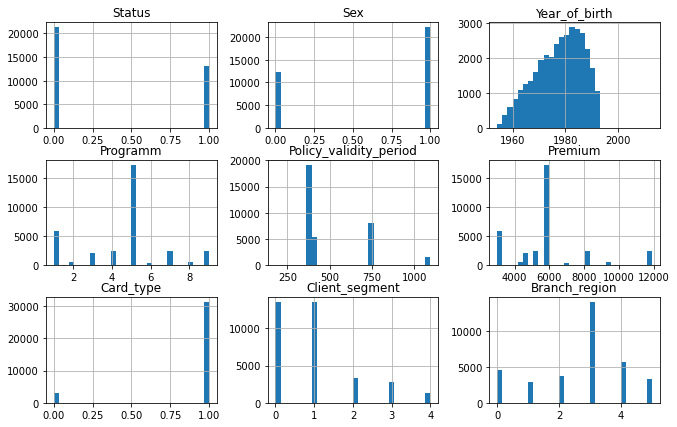

In [28]:
data.hist(bins=30)

<AxesSubplot:>

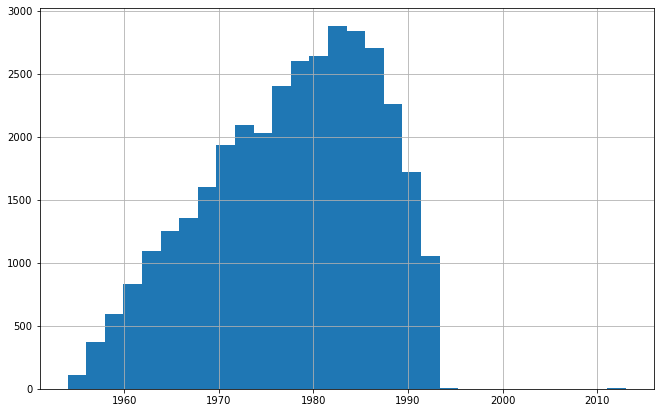

In [29]:
data['Year_of_birth'].hist(bins=30)

<AxesSubplot:>

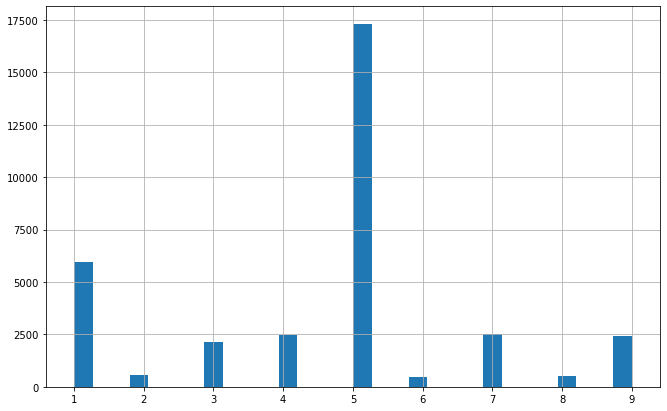

In [30]:
data['Programm'].hist(bins=30)

Из всех клиентов самые многочисленные это клиенты 1980-1985 г.р.

Больше всего клиентов обслуживаются в отделении банка региона RBA (на графике 3).

Самая популярная программа 'Индивидуальный платиновый план' (на графике 5).

Самый многочисленные сегменты клиентов Unidentified (0) и Mass (1)

In [31]:
import seaborn as sns

Посмотрим есть ли зависимости среди переменных

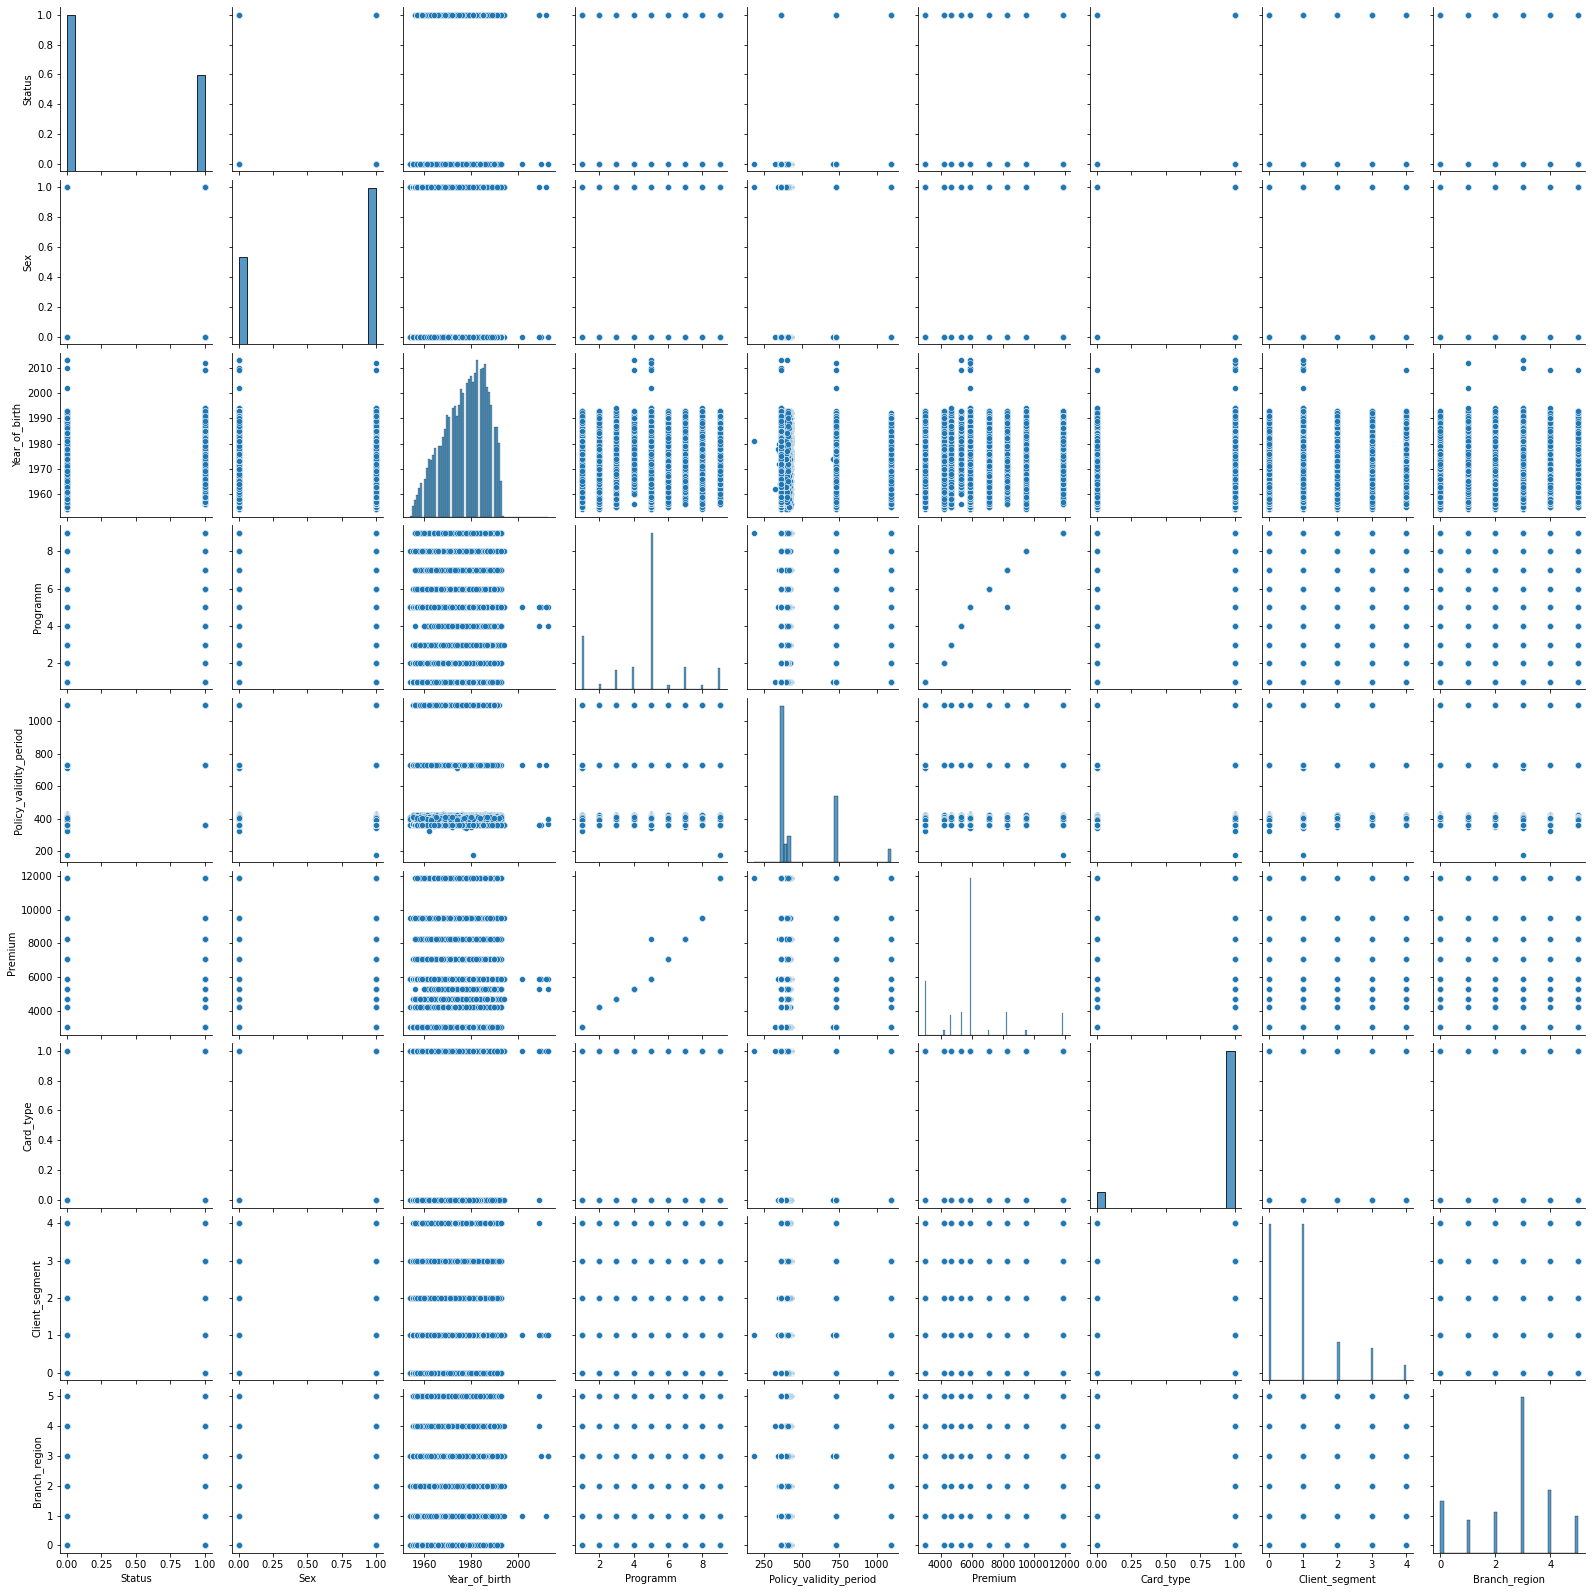

In [32]:
sns.pairplot(data)

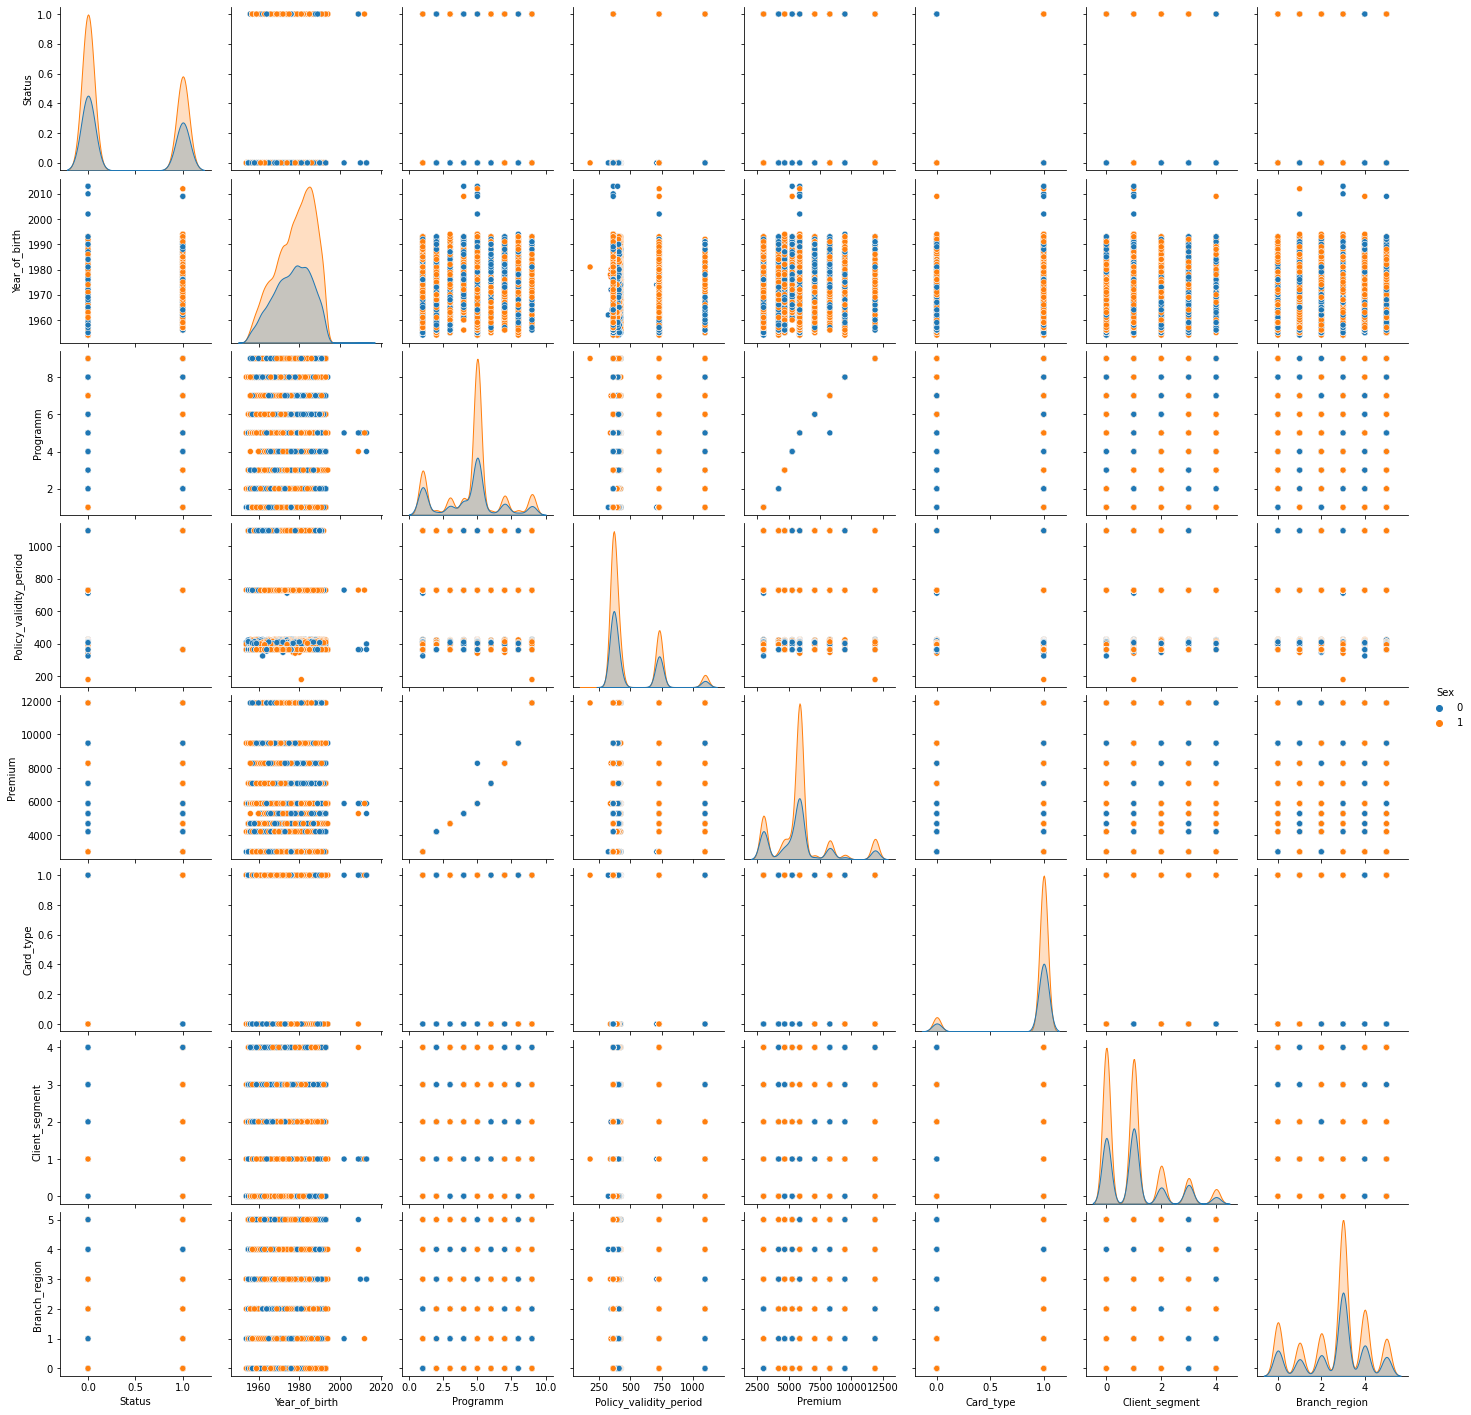

In [33]:
sns.pairplot(data, hue='Sex')

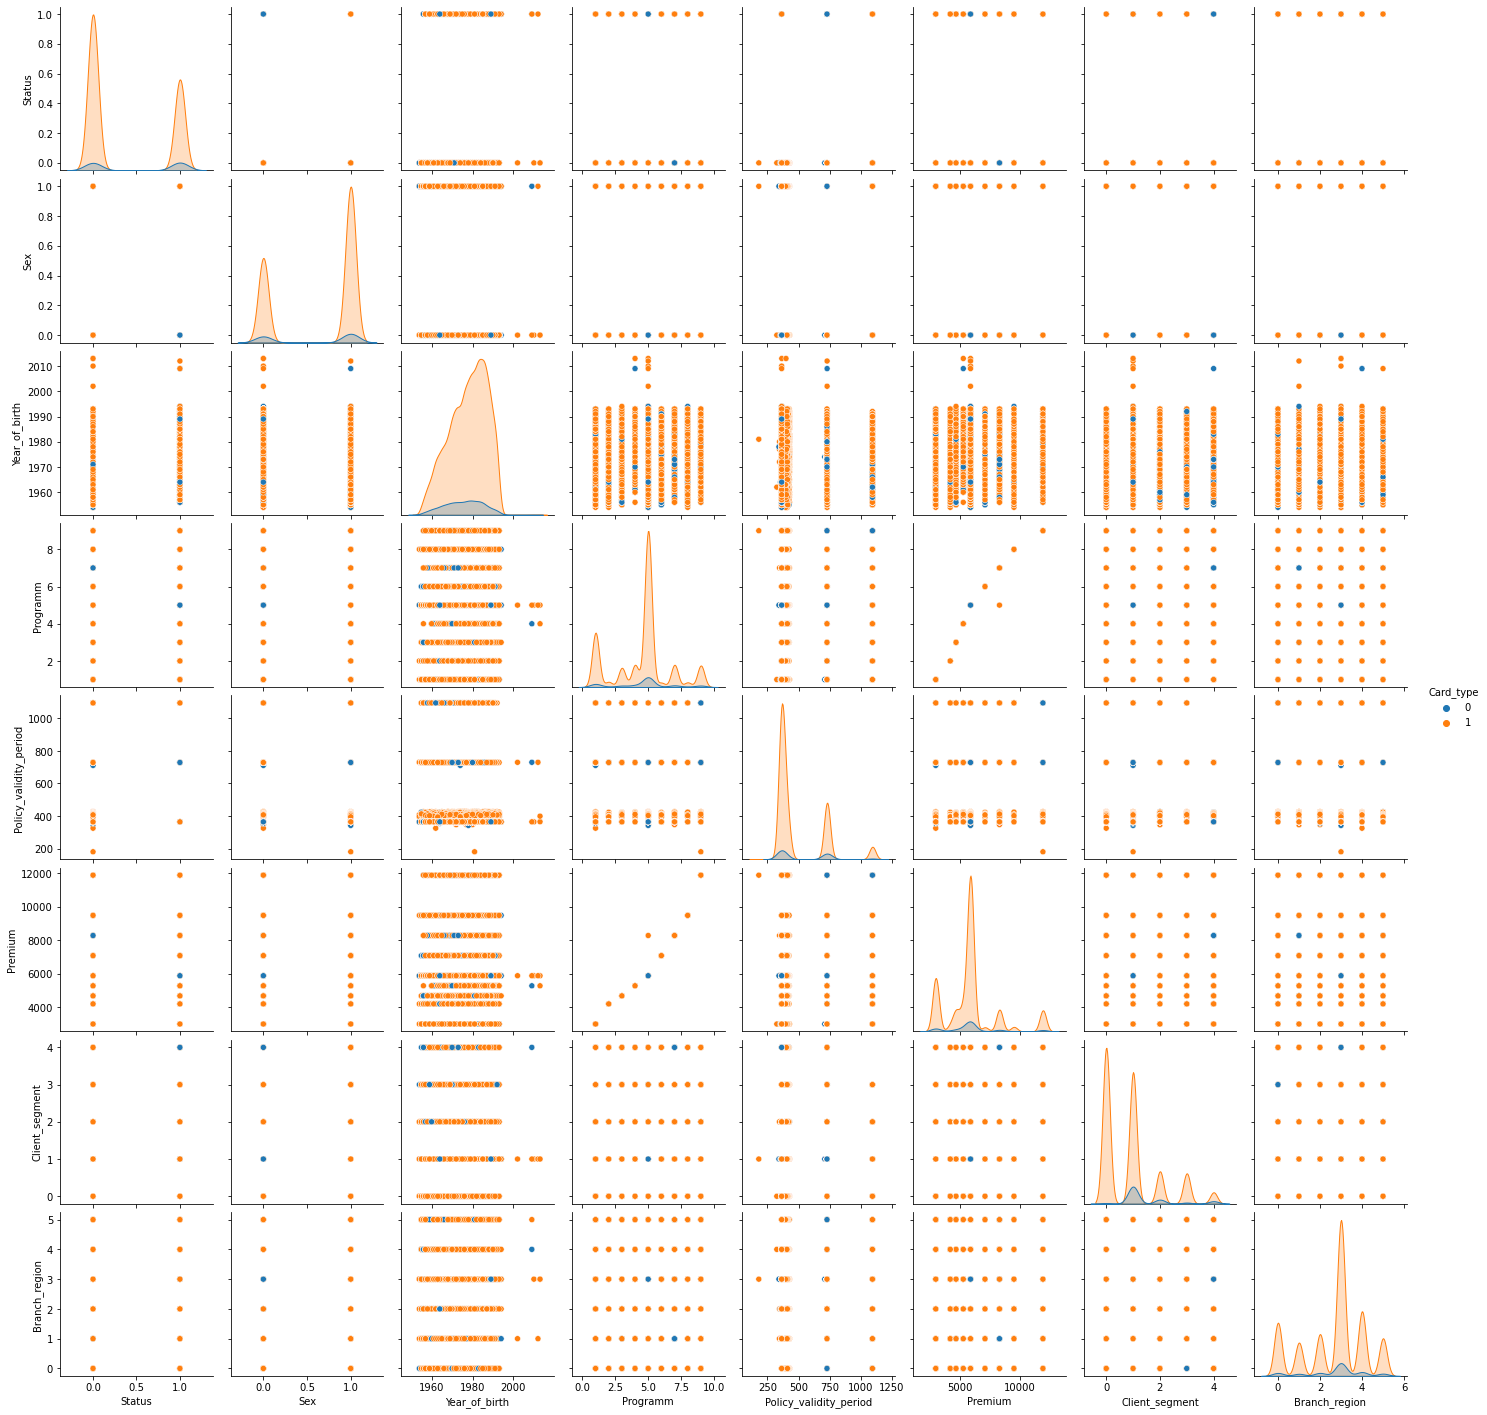

In [34]:
sns.pairplot(data, hue='Card_type')

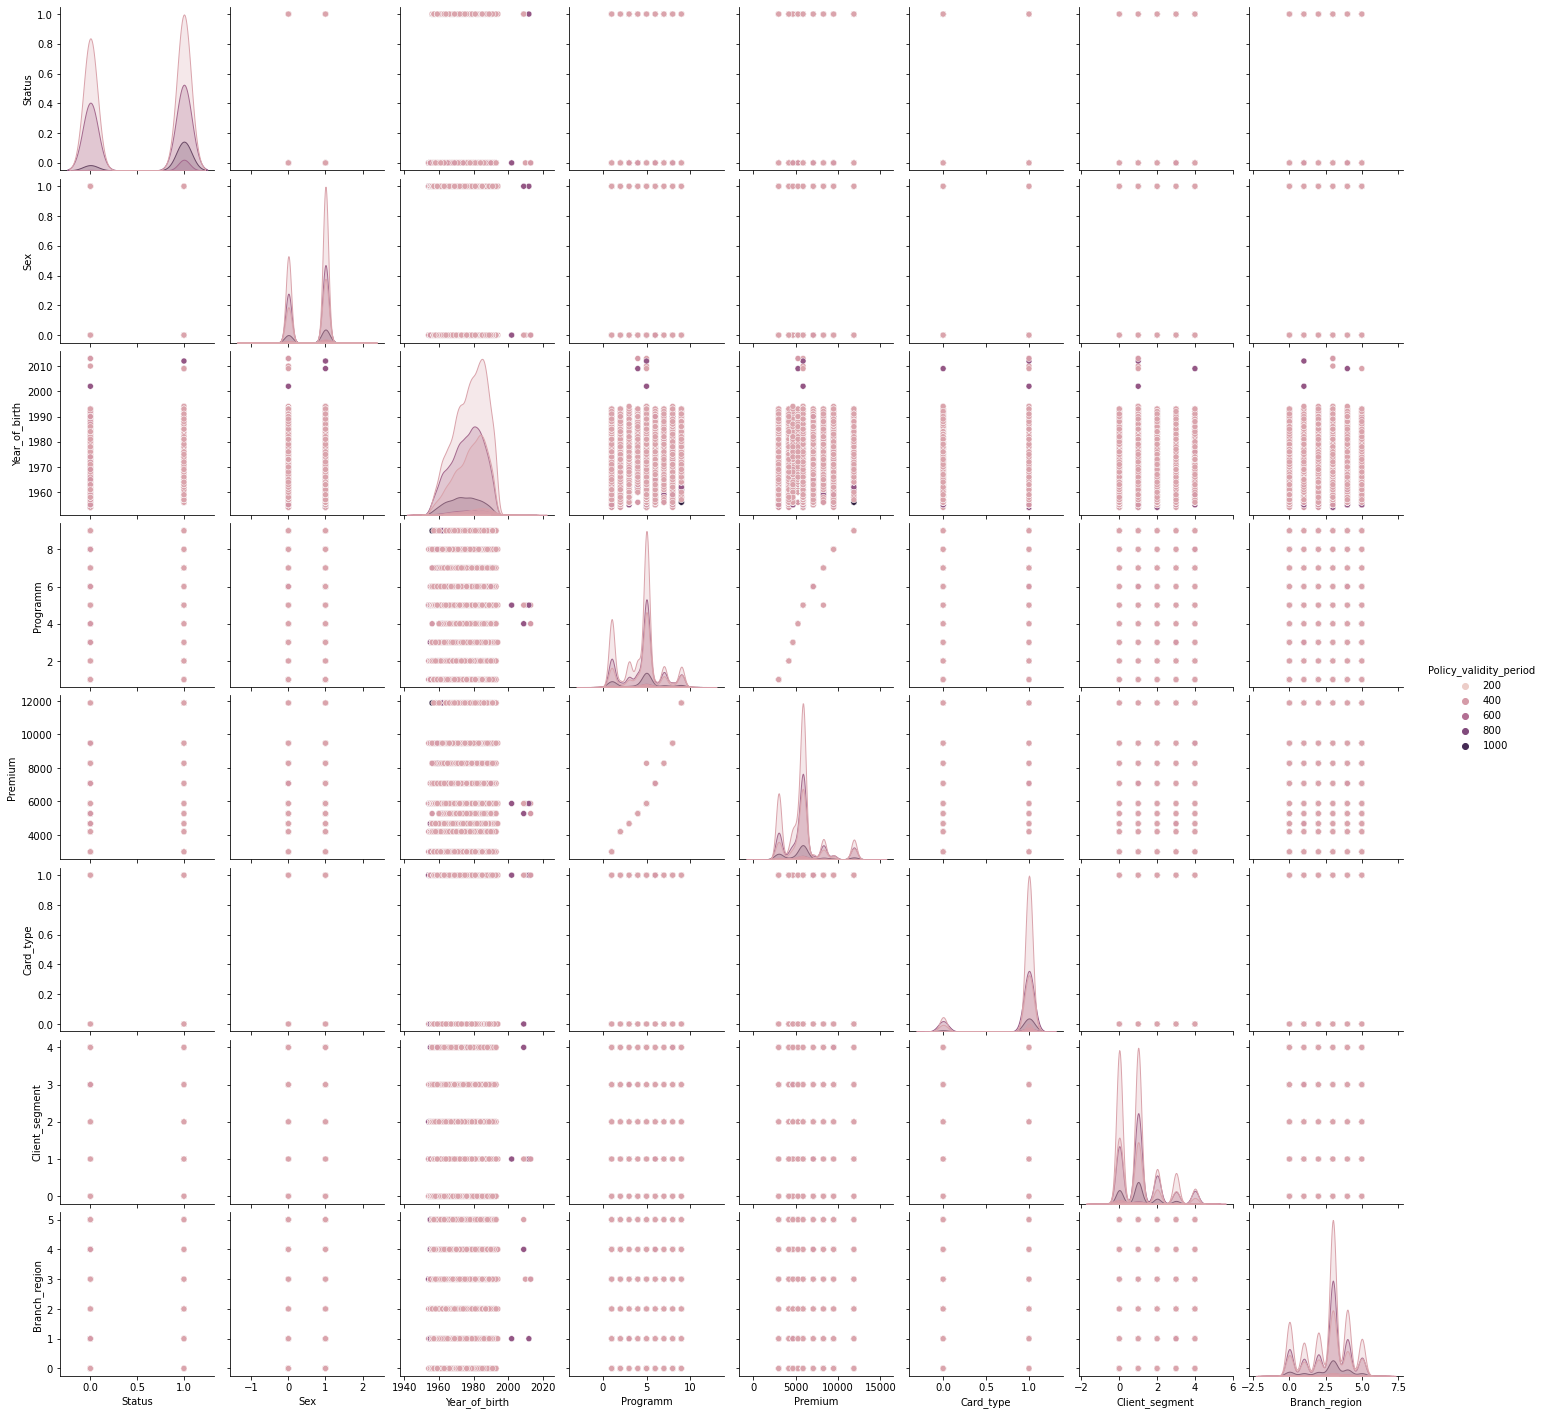

In [35]:
sns.pairplot(data, hue='Policy_validity_period')

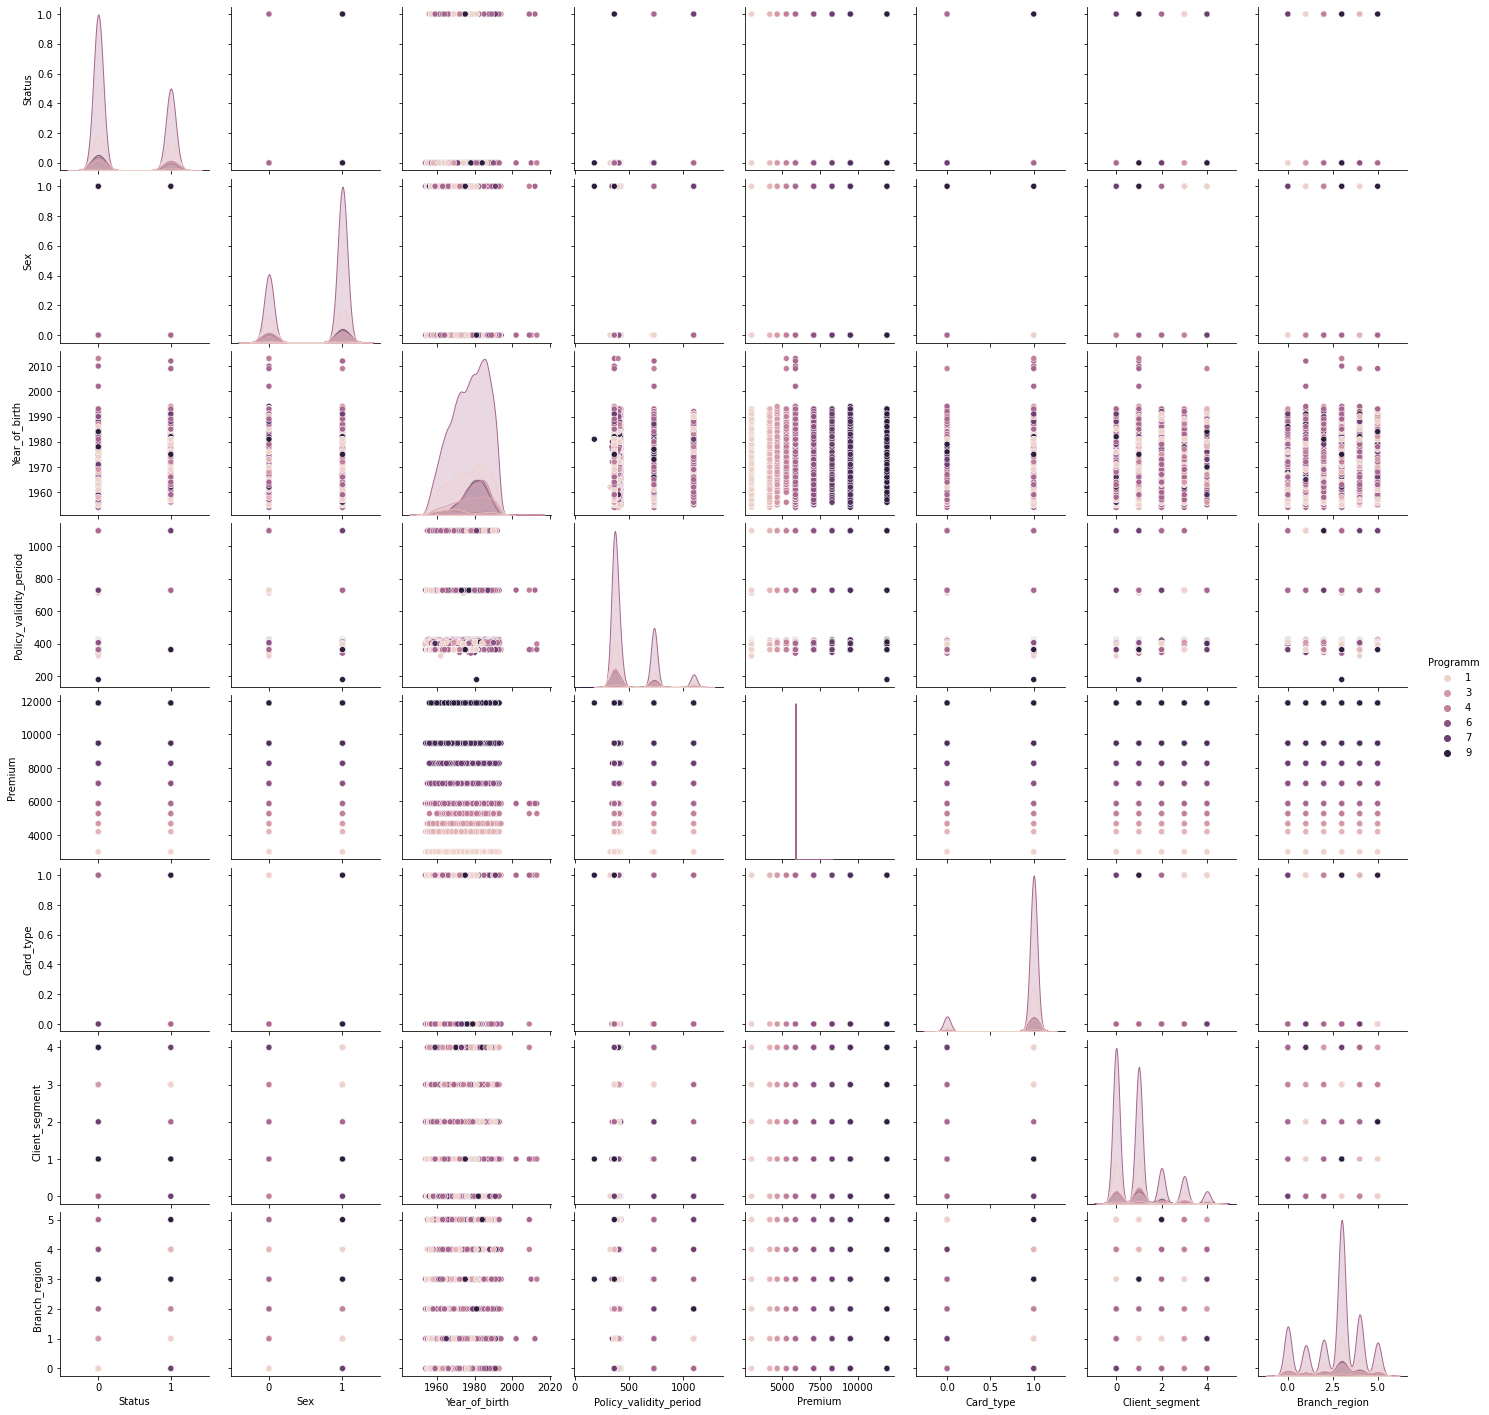

In [36]:
sns.pairplot(data, hue='Programm')

<AxesSubplot:>

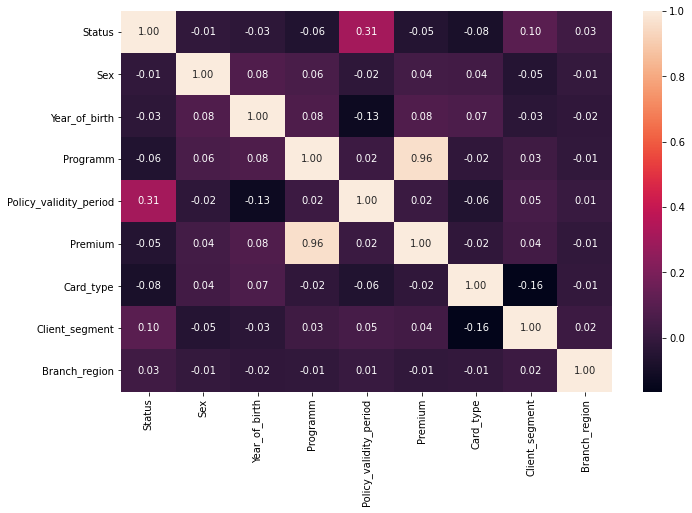

In [37]:
Corr = data.corr()
sns.heatmap(Corr, annot=True, fmt='.2f')

Значимых зависимостей нет, только между программами и премиями, но так и должно быть (чем дороже премия, тем больше значение цифры в кодированной переменной).

Проверим меньше ли срок страхования и премия в случае, если клиент владеет кредитной картой.

In [38]:
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,0,1,1961.0,5,364,5880,1,0,0
1,0,1,1959.0,2,364,4200,1,1,0
2,0,1,1974.0,5,364,5880,1,1,1
3,0,0,1966.0,5,408,5880,1,0,2
4,0,1,1977.0,5,347,5880,1,2,1
...,...,...,...,...,...,...,...,...,...
34397,1,1,1985.0,5,364,5880,1,1,0
34398,1,1,1991.0,7,364,8280,1,0,0
34399,1,1,1969.0,1,364,3000,1,1,1
34400,1,0,1989.0,5,364,5880,0,1,3


Сгруппируем по типу карты.

In [39]:
Card_type = data.groupby('Card_type').mean()
Card_type

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Client_segment,Branch_region
Card_type,,,,,,,,
0,0.510605,0.587528,1975.504907,4.645774,532.993985,6004.482431,1.531814,2.714783
1,0.368354,0.648238,1977.771653,4.533184,488.253780,5889.301730,0.921108,2.668290


In [40]:
import numpy as np

<AxesSubplot:ylabel='Card_type'>

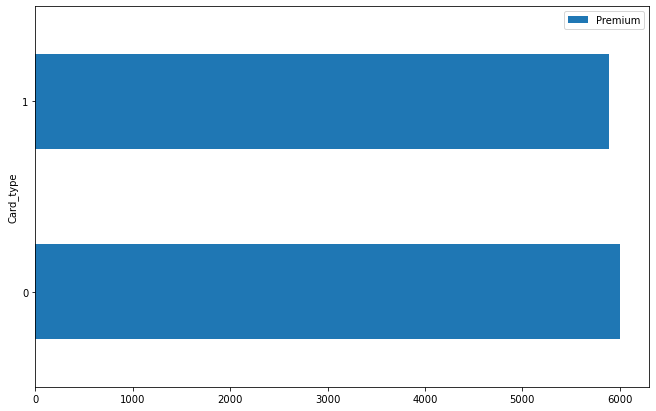

In [41]:
Card_type[['Premium']].plot(kind='barh', rot=0, stacked=True, label='index')


<AxesSubplot:ylabel='Card_type'>

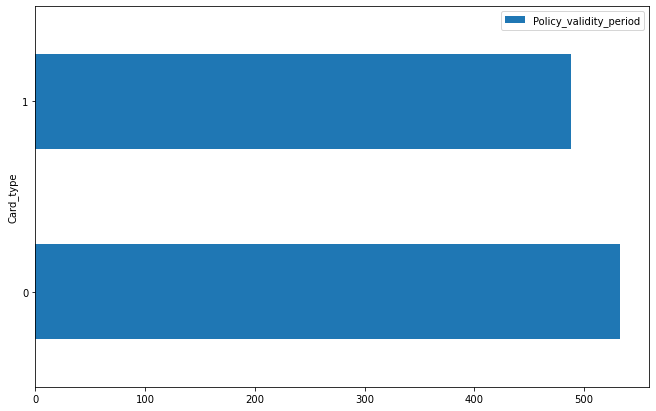

In [42]:
Card_type[['Policy_validity_period']].plot(kind='barh', rot=0, stacked=True, label='index')

Средне значение премии среди владельце кредитных карт выше на 9% больше и срок полиса больше на 2%.

Посмотрим что меняется в данных в зависимости от пола клиента

In [45]:
data_sex = data.groupby('Sex').mean()
data_sex

,Status,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
Sex,,,,,,,,
0,0.390802,1976.587709,4.367684,498.540985,5775.042735,0.893936,1.043875,2.682377
1,0.376211,1978.105866,4.641305,488.930705,5969.302073,0.915995,0.940165,2.667104


array([<AxesSubplot:ylabel='Policy_validity_period'>], dtype=object)

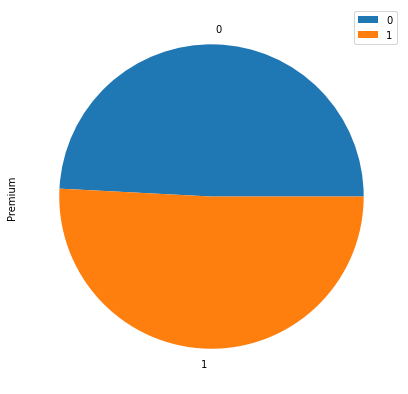

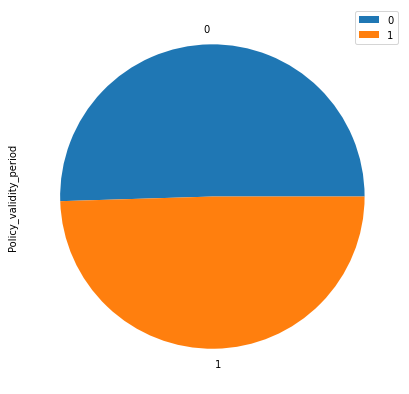

In [46]:
data_sex[['Premium']].plot(kind='pie', rot=0, stacked=True, label='index', subplots=True)
data_sex[['Policy_validity_period']].plot(kind='pie', rot=90, stacked=True, label='index', subplots=True)


In [47]:
data_sex_pr_0 = data[data['Sex']== 0].groupby('Programm').count()
data_sex_pr_0 = data_sex_pr_0[['Sex']]
data_sex_pr_0

,Sex
Programm,
1,2554
2,236
3,815
4,1213
5,5273
6,183
7,1023
8,182
9,806


In [48]:
data_sex_pr_1 = data[data['Sex']== 1].groupby('Programm').count()
data_sex_pr_1 = data_sex_pr_1[['Sex']]
data_sex_pr_1

,Sex
Programm,
1,3408
2,349
3,1330
4,1270
5,12009
6,307
7,1479
8,349
9,1593


In [49]:
# df.set_index('key').join(other.set_index('key'))

data_sex_pr = pd.concat([data_sex_pr_0, data_sex_pr_1], axis=1)
data_sex_pr.columns = ['F', 'M']
data_sex_pr

,F,M
Programm,,
1,2554,3408
2,236,349
3,815,1330
4,1213,1270
5,5273,12009
6,183,307
7,1023,1479
8,182,349
9,806,1593


In [50]:
# Количество женщин = 12285
# Количество мужчин = 22094

def eqval(row):
    return row['M'] / (22094/12285)

In [51]:
# Уменьшаем количество мужчин, чтобы можнобыло сравнить с количество женщин по программам

data_sex_pr['M'] = data_sex_pr.apply(eqval, axis=1)

data_sex_pr

,F,M
Programm,,
1,2554,1894.961528
2,236,194.055626
3,815,739.524305
4,1213,706.162307
5,5273,6677.404046
6,183,170.702227
7,1023,822.373269
8,182,194.055626
9,806,885.761066


In [52]:
def ratio(row):
    return (row['F'] / row['M'])*100 - 100

In [53]:
data_sex_pr['ratio'] = data_sex_pr.apply(ratio, axis=1)
data_sex_pr

,F,M,ratio
Programm,,,
1,2554,1894.961528,34.778462
2,236,194.055626,21.614614
3,815,739.524305,10.205979
4,1213,706.162307,71.773541
5,5273,6677.404046,-21.032186
6,183,170.702227,7.204225
7,1023,822.373269,24.396067
8,182,194.055626,-6.212459
9,806,885.761066,-9.004806


Клиенты женского пола приобретают полисы по следующим планам в сравнении с мужчинами:
* Индивидуальный серебряный план - больше на 35 % 
* Семейный серебряный план - больше на 22 %
* Индивидуальный золотой план - больше на 10 %
* Семейный расширеный серебряный план - больше на 71 %
* Семейный золотой план - больше на 7 %
* Семейный расширенный золотой план - больше на 24 % 
* Индивидуальный платиновый план - меньше на 21 %
* Семейный платиновый план - меньше на 6 %
* Семейный расширенный платиновый план - меньше на 9 %

Посмотрим в каком офисе, в среднем, самые большие премии и сроки действия полисов.

In [54]:
branch_data = data.groupby('Branch_region').mean()
branch_data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment
Branch_region,,,,,,,,
0,0.353790,0.656115,1977.809647,4.583764,482.896210,5939.870801,0.925280,0.878338
1,0.321659,0.642639,1977.231214,4.537572,483.793608,5903.175791,0.916355,0.907854
2,0.358197,0.650389,1977.829085,4.401395,487.123692,5800.343440,0.906359,0.939630
3,0.401973,0.628762,1977.643171,4.623296,500.220897,5967.052811,0.893455,1.068427
4,0.418223,0.662672,1977.535953,4.517096,497.814240,5865.491717,0.920515,0.953296
5,0.348865,0.639939,1976.920121,4.357943,476.364297,5725.760968,0.919818,0.872617


<AxesSubplot:xlabel='Branch_region'>

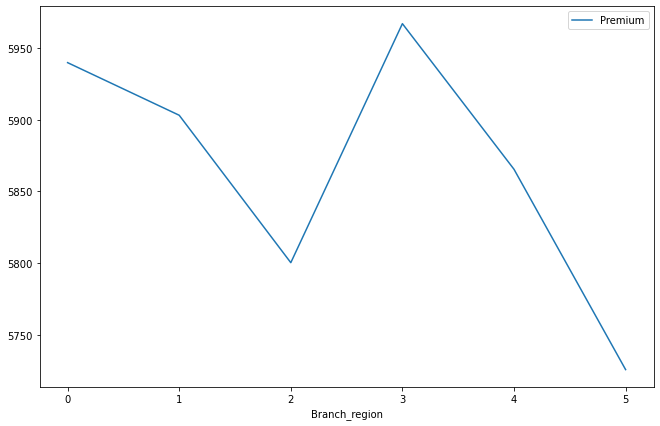

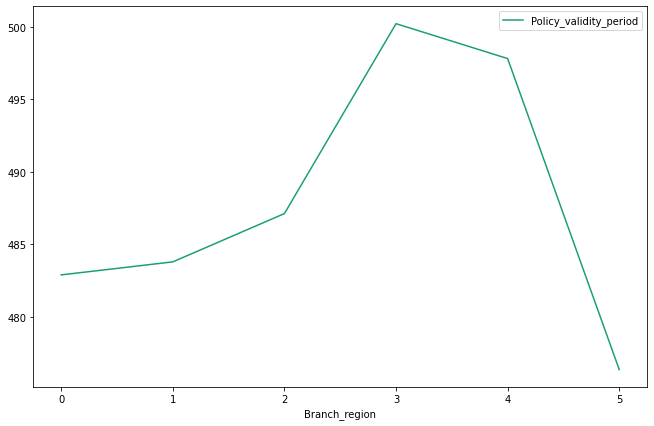

In [55]:
branch_data[['Premium']].plot(kind='line', rot=0, stacked=True, label='index', colormap='tab10')
branch_data[['Policy_validity_period']].plot(kind='line', rot=0, stacked=True, label='index', colormap='Dark2')

У филиала в регионе RBA (на графике 3) самые лучшие показатели.

Посмотрим на показатели, сгруппировав данные по программам.

In [56]:
Programm_data = data.groupby('Programm').mean()
Programm_data

,Status,Sex,Year_of_birth,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
Programm,,,,,,,,
1,0.438443,0.571620,1976.436934,491.428715,3000.000000,0.919155,0.974505,2.711674
2,0.521368,0.596581,1972.312821,531.721368,4200.000000,0.888889,1.022222,2.630769
3,0.438228,0.620047,1977.764103,464.082984,4680.000000,0.901632,0.956643,2.675524
4,0.426903,0.511478,1980.628675,479.800644,5280.000000,0.894885,1.030205,2.609746
5,0.344405,0.694885,1977.283532,492.785036,5880.138873,0.911526,0.926340,2.678741
6,0.459184,0.626531,1972.689796,517.075510,7080.000000,0.881633,1.036735,2.651020
7,0.402878,0.591127,1980.019584,499.553957,8280.000000,0.896083,1.103917,2.673461
8,0.453861,0.657250,1973.263653,561.467043,9480.000000,0.881356,1.199623,2.709981
9,0.320133,0.664027,1979.692372,492.518549,11880.000000,0.904127,1.109629,2.598583


<AxesSubplot:xlabel='Programm'>

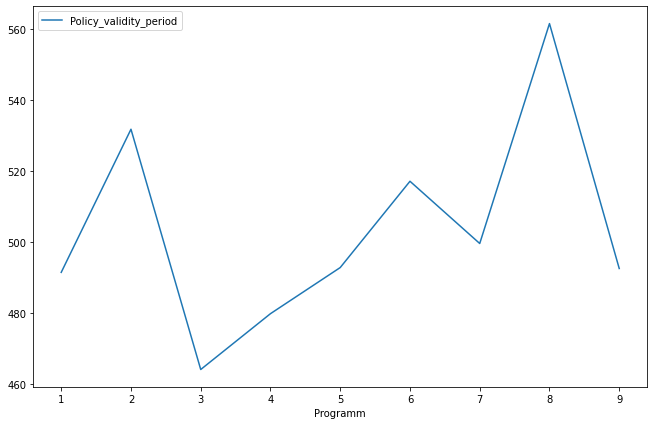

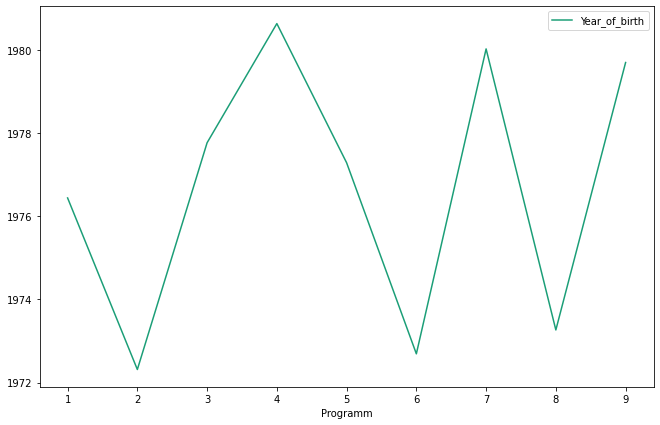

In [57]:
Programm_data[['Policy_validity_period']].plot(kind='line', rot=0, stacked=True, label='index', colormap='tab10')
Programm_data[['Year_of_birth']].plot(kind='line', rot=0, stacked=True, label='index', colormap='Dark2')

Группируем по клиентским сегментам.

In [58]:
Client_data = data.groupby('Client_segment').mean()
Client_data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Branch_region
Client_segment,,,,,,,,
0,0.305375,0.672861,1977.324104,4.500962,466.883699,5823.704471,0.996521,2.661016
1,0.425863,0.625019,1978.257221,4.487483,511.955266,5862.482595,0.840838,2.640720
2,0.484894,0.669789,1976.934139,5.071601,532.701813,6446.066465,0.845619,2.877341
3,0.295438,0.541999,1977.141926,4.124909,465.605358,5506.053584,0.949312,2.476828
4,0.629915,0.656901,1975.335389,5.114109,507.849653,6527.463377,0.759445,3.018504


<AxesSubplot:xlabel='Client_segment'>

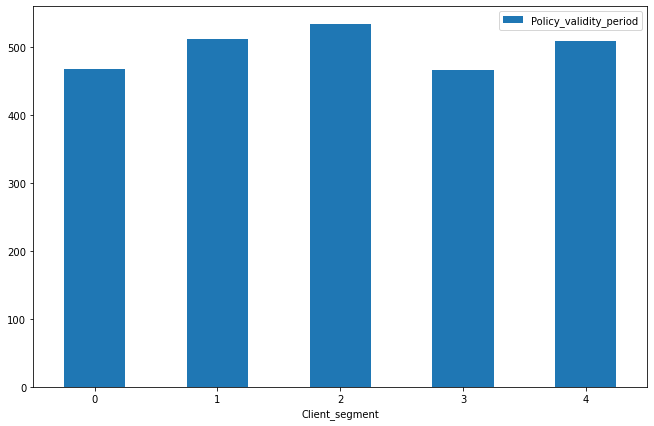

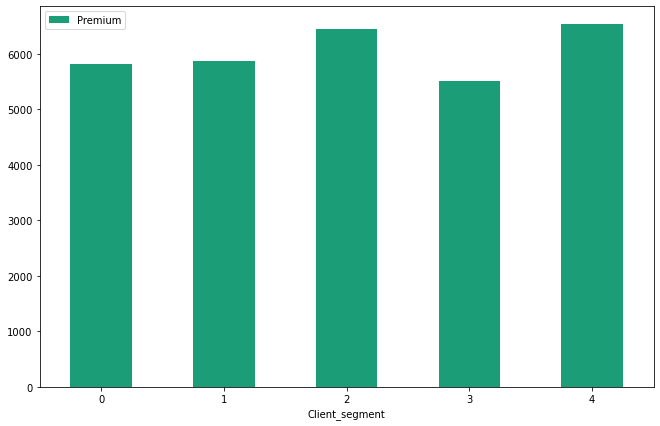

In [59]:
Client_data[['Policy_validity_period']].plot(kind='bar', rot=0, stacked=True, label='index', colormap='tab10')
Client_data[['Premium']].plot(kind='bar', rot=0, stacked=True, label='index', colormap='Dark2')

Сегменты Mass Affluent и Affluent в среднем имеют самый большой показатель премии и длительности полиса.

Попробуем оценить как меняются показатели в зависимости от года рождения клиента.

In [60]:
Year_data = data.groupby('Year_of_birth').mean()
Year_data

,Status,Sex,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
Year_of_birth,,,,,,,,
1954.0,0.000000,0.666667,4.555556,462.111111,5773.333333,0.888889,1.000000,2.333333
1955.0,0.000000,0.509804,3.696078,543.470588,5002.352941,0.852941,0.882353,2.882353
1956.0,0.281250,0.556250,3.550000,555.300000,5009.250000,0.850000,1.118750,2.787500
1957.0,0.436620,0.596244,3.967136,535.981221,5267.042254,0.882629,1.098592,2.845070
1958.0,0.394928,0.630435,3.916667,538.025362,5248.695652,0.891304,1.144928,2.898551
1959.0,0.415625,0.659375,3.825000,542.965625,5174.250000,0.871875,1.125000,2.703125
1960.0,0.467213,0.595628,4.005464,536.918033,5268.196721,0.857923,1.133880,2.628415
1961.0,0.432900,0.612554,3.883117,536.867965,5244.155844,0.883117,1.025974,2.645022
1962.0,0.443841,0.592391,4.083333,537.193841,5397.391304,0.889493,1.074275,2.846014


<AxesSubplot:xlabel='Year_of_birth'>

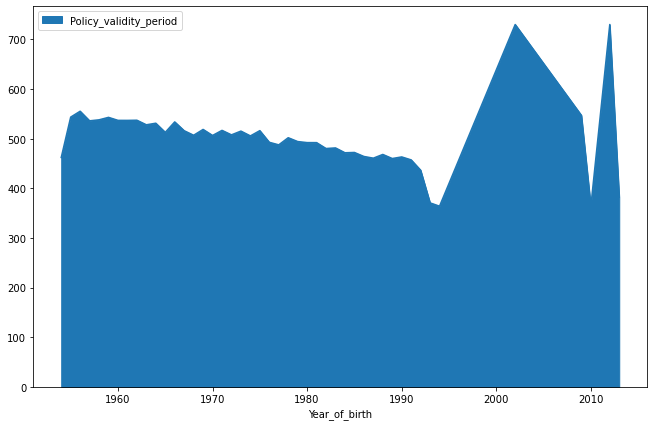

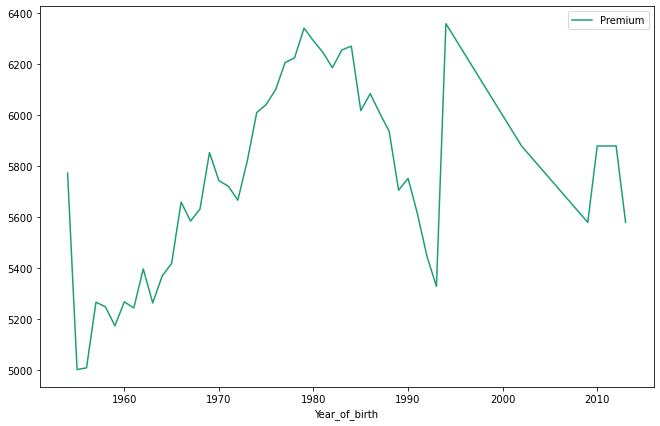

In [61]:
Year_data[['Policy_validity_period']].plot(kind='area', rot=0, stacked=True, label='index', colormap='tab10')
Year_data[['Premium']].plot(kind='line', rot=0, stacked=True, label='index', colormap='Dark2')

array([[<AxesSubplot:title={'center':'Year_of_birth'}>]], dtype=object)

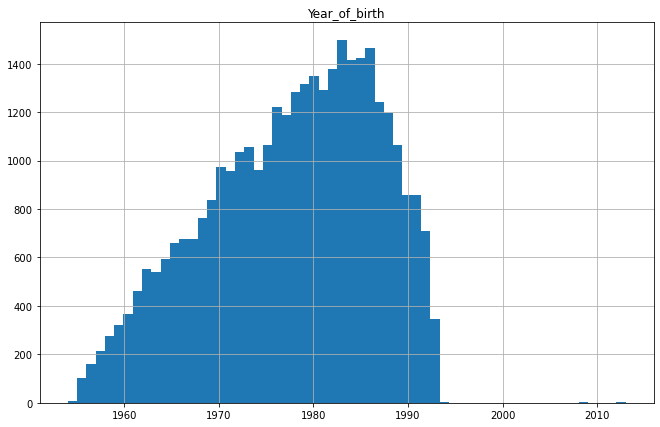

In [62]:
data[['Year_of_birth']].hist(bins=60)

Клиенты 1979 года +/- 2 года имеют самые высокие показатели премии.
Есть аномалии в данных после 1995 г.р. в премии и в сроке полиса.

In [63]:
data

,Status,Sex,Year_of_birth,Programm,Policy_validity_period,Premium,Card_type,Client_segment,Branch_region
0,0,1,1961.0,5,364,5880,1,0,0
1,0,1,1959.0,2,364,4200,1,1,0
2,0,1,1974.0,5,364,5880,1,1,1
3,0,0,1966.0,5,408,5880,1,0,2
4,0,1,1977.0,5,347,5880,1,2,1
...,...,...,...,...,...,...,...,...,...
34397,1,1,1985.0,5,364,5880,1,1,0
34398,1,1,1991.0,7,364,8280,1,0,0
34399,1,1,1969.0,1,364,3000,1,1,1
34400,1,0,1989.0,5,364,5880,0,1,3


In [64]:
# датасет для определения периода длительности подписки, после заключения контракта

data_ml_period_with_prog = data.drop(['Status', 'Premium'], axis=1)
data_ml_period_with_prog

,Sex,Year_of_birth,Programm,Policy_validity_period,Card_type,Client_segment,Branch_region
0,1,1961.0,5,364,1,0,0
1,1,1959.0,2,364,1,1,0
2,1,1974.0,5,364,1,1,1
3,0,1966.0,5,408,1,0,2
4,1,1977.0,5,347,1,2,1
...,...,...,...,...,...,...,...
34397,1,1985.0,5,364,1,1,0
34398,1,1991.0,7,364,1,0,0
34399,1,1969.0,1,364,1,1,1
34400,0,1989.0,5,364,0,1,3


In [65]:
# датасет для прогнозирования периода действия полиса

data_ml_period = data.drop(['Status', 'Programm', 'Premium'], axis=1)
data_ml_period

,Sex,Year_of_birth,Policy_validity_period,Card_type,Client_segment,Branch_region
0,1,1961.0,364,1,0,0
1,1,1959.0,364,1,1,0
2,1,1974.0,364,1,1,1
3,0,1966.0,408,1,0,2
4,1,1977.0,347,1,2,1
...,...,...,...,...,...,...
34397,1,1985.0,364,1,1,0
34398,1,1991.0,364,1,0,0
34399,1,1969.0,364,1,1,1
34400,0,1989.0,364,0,1,3


In [66]:
# датасет для прогнозирования размера премии

data_ml_premium = data.drop(['Status', 'Programm', 'Policy_validity_period'], axis=1)
data_ml_premium

,Sex,Year_of_birth,Premium,Card_type,Client_segment,Branch_region
0,1,1961.0,5880,1,0,0
1,1,1959.0,4200,1,1,0
2,1,1974.0,5880,1,1,1
3,0,1966.0,5880,1,0,2
4,1,1977.0,5880,1,2,1
...,...,...,...,...,...,...
34397,1,1985.0,5880,1,1,0
34398,1,1991.0,8280,1,0,0
34399,1,1969.0,3000,1,1,1
34400,0,1989.0,5880,0,1,3


# Подбор моделей Машинного обучения

Пробуем предсказать период обслуживания клиента, в случае, если нам известна программа страхования.

In [67]:
data_ml_period_with_prog

,Sex,Year_of_birth,Programm,Policy_validity_period,Card_type,Client_segment,Branch_region
0,1,1961.0,5,364,1,0,0
1,1,1959.0,2,364,1,1,0
2,1,1974.0,5,364,1,1,1
3,0,1966.0,5,408,1,0,2
4,1,1977.0,5,347,1,2,1
...,...,...,...,...,...,...,...
34397,1,1985.0,5,364,1,1,0
34398,1,1991.0,7,364,1,0,0
34399,1,1969.0,1,364,1,1,1
34400,0,1989.0,5,364,0,1,3


In [68]:
# Сделали OHE для категориальной переменной
drop_model = pd.get_dummies(data_ml_period_with_prog['Client_segment'], drop_first=True, prefix='Client_segment')

# Объединили назад наши таблички
data_ml_period_with_prog = pd.concat([data_ml_period_with_prog.drop('Client_segment', axis=1), drop_model], axis=1)
data_ml_period_with_prog

,Sex,Year_of_birth,Programm,Policy_validity_period,Card_type,Branch_region,Client_segment_1,Client_segment_2,Client_segment_3,Client_segment_4
0,1,1961.0,5,364,1,0,0,0,0,0
1,1,1959.0,2,364,1,0,1,0,0,0
2,1,1974.0,5,364,1,1,1,0,0,0
3,0,1966.0,5,408,1,2,0,0,0,0
4,1,1977.0,5,347,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
34397,1,1985.0,5,364,1,0,1,0,0,0
34398,1,1991.0,7,364,1,0,0,0,0,0
34399,1,1969.0,1,364,1,1,1,0,0,0
34400,0,1989.0,5,364,0,3,1,0,0,0


In [69]:
# Сделали OHE для категориальной переменной
drop_model = pd.get_dummies(data_ml_period_with_prog['Branch_region'], drop_first=True, prefix='Branch_region')

# Объединили назад наши таблички
data_ml_period_with_prog = pd.concat([data_ml_period_with_prog.drop('Branch_region', axis=1), drop_model], axis=1)
data_ml_period_with_prog

,Sex,Year_of_birth,Programm,Policy_validity_period,Card_type,Client_segment_1,Client_segment_2,Client_segment_3,Client_segment_4,Branch_region_1,Branch_region_2,Branch_region_3,Branch_region_4,Branch_region_5
0,1,1961.0,5,364,1,0,0,0,0,0,0,0,0,0
1,1,1959.0,2,364,1,1,0,0,0,0,0,0,0,0
2,1,1974.0,5,364,1,1,0,0,0,1,0,0,0,0
3,0,1966.0,5,408,1,0,0,0,0,0,1,0,0,0
4,1,1977.0,5,347,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34397,1,1985.0,5,364,1,1,0,0,0,0,0,0,0,0
34398,1,1991.0,7,364,1,0,0,0,0,0,0,0,0,0
34399,1,1969.0,1,364,1,1,0,0,0,1,0,0,0,0
34400,0,1989.0,5,364,0,1,0,0,0,0,0,1,0,0


In [70]:
from sklearn.model_selection import train_test_split

# Разбиваем на тренировочную и тестовую выборку

X_train, X_test, y_train, y_test = train_test_split(
    data_ml_period_with_prog.drop(['Policy_validity_period'], axis=1),
    data_ml_period_with_prog['Policy_validity_period'],
    test_size=0.30,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24065, 13), (10314, 13), (24065,), (10314,))

Попробуем признак 'Programm' представить не как категориальный, а как количественный, так как чем больше номер программы, тем дороже премия.

In [71]:
from sklearn.preprocessing import StandardScaler

# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(X_train[['Year_of_birth', 'Programm']])

# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(X_train[['Year_of_birth', 'Programm']])

# Применяем скалирвощик к тесту
df_test_scale = scaler.transform(X_test[['Year_of_birth', 'Programm']])

# Заменяем значения на отскалированные
X_train[['Year_of_birth', 'Programm']] = df_train_scale
X_test[['Year_of_birth', 'Programm']] = df_test_scale

In [72]:
X_train

,Sex,Year_of_birth,Programm,Card_type,Client_segment_1,Client_segment_2,Client_segment_3,Client_segment_4,Branch_region_1,Branch_region_2,Branch_region_3,Branch_region_4,Branch_region_5
13253,1,1.583653,0.213275,1,0,0,0,0,0,1,0,0,0
31273,1,-2.254836,-1.651044,1,0,0,1,0,0,0,0,0,0
9542,1,-0.061414,1.145435,1,1,0,0,0,0,0,0,0,0
16789,0,1.583653,-0.718884,1,1,0,0,0,0,0,1,0,0
8834,1,-2.145165,0.213275,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,1,0.486942,2.077595,1,0,1,0,0,0,0,0,1,0
6265,0,0.157928,2.077595,1,0,1,0,0,0,0,0,1,0
11284,1,-1.158125,-1.184964,1,0,0,0,0,0,0,0,0,1
860,1,1.364310,-1.651044,1,0,0,1,0,0,0,0,0,1


In [73]:
np.isnan(X_train).sum()

Sex                 0
Year_of_birth       0
Programm            0
Card_type           0
Client_segment_1    0
Client_segment_2    0
Client_segment_3    0
Client_segment_4    0
Branch_region_1     0
Branch_region_2     0
Branch_region_3     0
Branch_region_4     0
Branch_region_5     0
dtype: int64

In [74]:
from sklearn import metrics  # подгружаем метрики

In [75]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [76]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

Обучим алгоритм линейной регрессии.

In [77]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [78]:
print_metrics(y_test, y_pred_regr)

MAE: 163.44115792410102
RMSE: 199.56908150922303
R2: 0.0330165828228286
MAPE: 32.159496897021114


Посмотрим какое качество предсказания выдает примитивная модель. В качестве прогноза - среднее значение периода.

In [79]:
import numpy as np

y_mean = np.mean(y_train)             # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им период в тестовой выборке

In [80]:
print_metrics(y_test, y_pred_naive)

MAE: 170.19812369068146
RMSE: 202.9604126931794
R2: -0.00012707374751608214
MAPE: 33.45212532264541


Прогноз ценности не имеет.

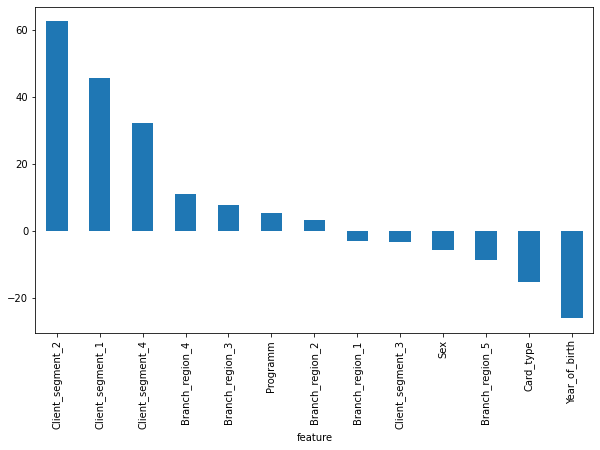

In [81]:
featureImportance = pd.DataFrame({"feature": data_ml_period_with_prog.drop('Policy_validity_period',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

Клиенты сегмента Mass, Mass Affluent, Affluent в прогнозировании больше всего прямо влияли на величину срока действия полиса. Год рождения обладает обратной связью на предсказание целевой переменной.

Лассо регрессия.

In [82]:
from sklearn.linear_model import LassoCV

In [83]:
lasso = LassoCV(eps=0.01)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)
print_metrics(y_test, pred_lasso)

MAE: 163.7586736375073
RMSE: 199.56449994480482
R2: 0.03306098094231513
MAPE: 32.222111301415644


XGBoost.

In [84]:
import xgboost as xgb

In [85]:
# Объявляем модель

xgb_r = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=2,
    n_estimators=200,
    objective="reg:linear",
    n_jobs = 2,
    random_state = 42
)

# Фитим модель
xgb_r.fit(X_train, y_train)

pred = xgb_r.predict(X_test)

print_metrics(y_test, pred)

[14:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 162.71726654212512
RMSE: 198.992085765193
R2: 0.038600000294493064
MAPE: 32.01601498608806


Предсказываем период обслуживания клиента

In [86]:
data_ml_period

,Sex,Year_of_birth,Policy_validity_period,Card_type,Client_segment,Branch_region
0,1,1961.0,364,1,0,0
1,1,1959.0,364,1,1,0
2,1,1974.0,364,1,1,1
3,0,1966.0,408,1,0,2
4,1,1977.0,347,1,2,1
...,...,...,...,...,...,...
34397,1,1985.0,364,1,1,0
34398,1,1991.0,364,1,0,0
34399,1,1969.0,364,1,1,1
34400,0,1989.0,364,0,1,3


In [87]:
# Сделали OHE для категориальной переменной
drop_model = pd.get_dummies(data_ml_period['Client_segment'], drop_first=True, prefix='Client_segment')

# Объединили назад наши таблички
data_ml_period = pd.concat([data_ml_period.drop('Client_segment', axis=1), drop_model], axis=1)
data_ml_period

,Sex,Year_of_birth,Policy_validity_period,Card_type,Branch_region,Client_segment_1,Client_segment_2,Client_segment_3,Client_segment_4
0,1,1961.0,364,1,0,0,0,0,0
1,1,1959.0,364,1,0,1,0,0,0
2,1,1974.0,364,1,1,1,0,0,0
3,0,1966.0,408,1,2,0,0,0,0
4,1,1977.0,347,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
34397,1,1985.0,364,1,0,1,0,0,0
34398,1,1991.0,364,1,0,0,0,0,0
34399,1,1969.0,364,1,1,1,0,0,0
34400,0,1989.0,364,0,3,1,0,0,0


In [88]:
# Сделали OHE для категориальной переменной
drop_model = pd.get_dummies(data_ml_period['Branch_region'], drop_first=True, prefix='Branch_region')

# Объединили назад наши таблички
data_ml_period = pd.concat([data_ml_period.drop('Branch_region', axis=1), drop_model], axis=1)
data_ml_period

,Sex,Year_of_birth,Policy_validity_period,Card_type,Client_segment_1,Client_segment_2,Client_segment_3,Client_segment_4,Branch_region_1,Branch_region_2,Branch_region_3,Branch_region_4,Branch_region_5
0,1,1961.0,364,1,0,0,0,0,0,0,0,0,0
1,1,1959.0,364,1,1,0,0,0,0,0,0,0,0
2,1,1974.0,364,1,1,0,0,0,1,0,0,0,0
3,0,1966.0,408,1,0,0,0,0,0,1,0,0,0
4,1,1977.0,347,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34397,1,1985.0,364,1,1,0,0,0,0,0,0,0,0
34398,1,1991.0,364,1,0,0,0,0,0,0,0,0,0
34399,1,1969.0,364,1,1,0,0,0,1,0,0,0,0
34400,0,1989.0,364,0,1,0,0,0,0,0,1,0,0


In [89]:
from sklearn.model_selection import train_test_split

# Разбиваем на тренировочную и тестовую выборку

X_train, X_test, y_train, y_test = train_test_split(
    data_ml_period.drop(['Policy_validity_period'], axis=1),
    data_ml_period['Policy_validity_period'],
    test_size=0.30,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24065, 12), (10314, 12), (24065,), (10314,))

In [90]:
from sklearn.preprocessing import StandardScaler

# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(X_train[['Year_of_birth']])

# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(X_train[['Year_of_birth']])

# Применяем скалирвощик к тесту
df_test_scale = scaler.transform(X_test[['Year_of_birth']])

# Заменяем значения на отскалированные
X_train[['Year_of_birth']] = df_train_scale
X_test[['Year_of_birth']] = df_test_scale

In [91]:
X_train

,Sex,Year_of_birth,Card_type,Client_segment_1,Client_segment_2,Client_segment_3,Client_segment_4,Branch_region_1,Branch_region_2,Branch_region_3,Branch_region_4,Branch_region_5
13253,1,1.583653,1,0,0,0,0,0,1,0,0,0
31273,1,-2.254836,1,0,0,1,0,0,0,0,0,0
9542,1,-0.061414,1,1,0,0,0,0,0,0,0,0
16789,0,1.583653,1,1,0,0,0,0,0,1,0,0
8834,1,-2.145165,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16852,1,0.486942,1,0,1,0,0,0,0,0,1,0
6265,0,0.157928,1,0,1,0,0,0,0,0,1,0
11284,1,-1.158125,1,0,0,0,0,0,0,0,0,1
860,1,1.364310,1,0,0,1,0,0,0,0,0,1


In [92]:
np.isnan(X_train).sum()

Sex                 0
Year_of_birth       0
Card_type           0
Client_segment_1    0
Client_segment_2    0
Client_segment_3    0
Client_segment_4    0
Branch_region_1     0
Branch_region_2     0
Branch_region_3     0
Branch_region_4     0
Branch_region_5     0
dtype: int64

In [93]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [94]:
print_metrics(y_test, y_pred_regr)

MAE: 163.47303839350906
RMSE: 199.54709296002974
R2: 0.03322965581911497
MAPE: 32.16775109897763


In [95]:
import numpy as np

y_mean = np.mean(y_train)             # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им период в тестовой выборке

In [96]:
print_metrics(y_test, y_pred_naive)

MAE: 170.19812369068146
RMSE: 202.9604126931794
R2: -0.00012707374751608214
MAPE: 33.45212532264541


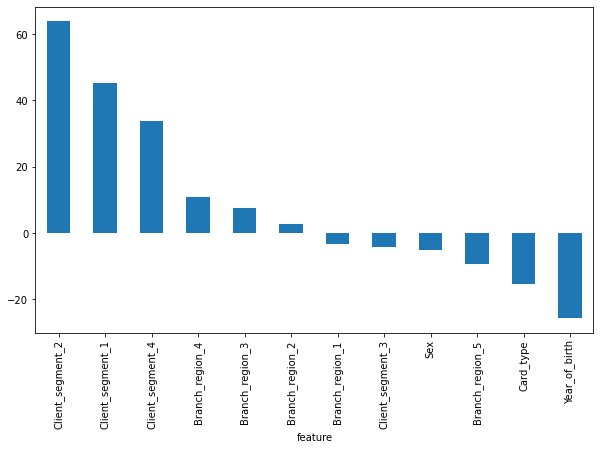

In [97]:
featureImportance = pd.DataFrame({"feature": data_ml_period.drop('Policy_validity_period',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [98]:
from sklearn.linear_model import LassoCV

In [99]:
lasso = LassoCV(eps=0.01)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)
print_metrics(y_test, pred_lasso)

MAE: 163.7879526541004
RMSE: 199.54344487368542
R2: 0.033265004161199596
MAPE: 32.22972025364755


In [100]:
import xgboost as xgb

In [101]:
# Объявляем модель

xgb_r = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=2,
    n_estimators=200,
    objective="reg:linear",
    n_jobs = 2,
    random_state = 42
)

# Фитим модель
xgb_r.fit(X_train, y_train)

pred = xgb_r.predict(X_test)

print_metrics(y_test, pred)

[14:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 163.13981517165212
RMSE: 199.29709949862126
R2: 0.03565048659491743
MAPE: 32.10637616671785


Пробуем предсказать премию

In [102]:
data_ml_premium

,Sex,Year_of_birth,Premium,Card_type,Client_segment,Branch_region
0,1,1961.0,5880,1,0,0
1,1,1959.0,4200,1,1,0
2,1,1974.0,5880,1,1,1
3,0,1966.0,5880,1,0,2
4,1,1977.0,5880,1,2,1
...,...,...,...,...,...,...
34397,1,1985.0,5880,1,1,0
34398,1,1991.0,8280,1,0,0
34399,1,1969.0,3000,1,1,1
34400,0,1989.0,5880,0,1,3


In [103]:
# Сделали OHE для категориальной переменной
drop_model = pd.get_dummies(data_ml_premium['Client_segment'], drop_first=True, prefix='Client_segment')

# Объединили назад наши таблички
data_ml_premium = pd.concat([data_ml_premium.drop('Client_segment', axis=1), drop_model], axis=1)
data_ml_premium

,Sex,Year_of_birth,Premium,Card_type,Branch_region,Client_segment_1,Client_segment_2,Client_segment_3,Client_segment_4
0,1,1961.0,5880,1,0,0,0,0,0
1,1,1959.0,4200,1,0,1,0,0,0
2,1,1974.0,5880,1,1,1,0,0,0
3,0,1966.0,5880,1,2,0,0,0,0
4,1,1977.0,5880,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
34397,1,1985.0,5880,1,0,1,0,0,0
34398,1,1991.0,8280,1,0,0,0,0,0
34399,1,1969.0,3000,1,1,1,0,0,0
34400,0,1989.0,5880,0,3,1,0,0,0


In [104]:
# Сделали OHE для категориальной переменной
drop_model = pd.get_dummies(data_ml_premium['Branch_region'], drop_first=True, prefix='Branch_region')

# Объединили назад наши таблички
data_ml_premium = pd.concat([data_ml_premium.drop('Branch_region', axis=1), drop_model], axis=1)
data_ml_premium

,Sex,Year_of_birth,Premium,Card_type,Client_segment_1,Client_segment_2,Client_segment_3,Client_segment_4,Branch_region_1,Branch_region_2,Branch_region_3,Branch_region_4,Branch_region_5
0,1,1961.0,5880,1,0,0,0,0,0,0,0,0,0
1,1,1959.0,4200,1,1,0,0,0,0,0,0,0,0
2,1,1974.0,5880,1,1,0,0,0,1,0,0,0,0
3,0,1966.0,5880,1,0,0,0,0,0,1,0,0,0
4,1,1977.0,5880,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34397,1,1985.0,5880,1,1,0,0,0,0,0,0,0,0
34398,1,1991.0,8280,1,0,0,0,0,0,0,0,0,0
34399,1,1969.0,3000,1,1,0,0,0,1,0,0,0,0
34400,0,1989.0,5880,0,1,0,0,0,0,0,1,0,0


In [105]:
from sklearn.model_selection import train_test_split

# Разбиваем на тренировочную и тестовую выборку

X_train, X_test, y_train, y_test = train_test_split(
    data_ml_premium.drop(['Premium'], axis=1),
    data_ml_premium['Premium'],
    test_size=0.30,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24065, 12), (10314, 12), (24065,), (10314,))

In [106]:
from sklearn.preprocessing import StandardScaler

# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(X_train[['Year_of_birth']])

# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(X_train[['Year_of_birth']])

# Применяем скалирвощик к тесту
df_test_scale = scaler.transform(X_test[['Year_of_birth']])

# Заменяем значения на отскалированные
X_train[['Year_of_birth']] = df_train_scale
X_test[['Year_of_birth']] = df_test_scale

In [107]:
X_train

,Sex,Year_of_birth,Card_type,Client_segment_1,Client_segment_2,Client_segment_3,Client_segment_4,Branch_region_1,Branch_region_2,Branch_region_3,Branch_region_4,Branch_region_5
13253,1,1.583653,1,0,0,0,0,0,1,0,0,0
31273,1,-2.254836,1,0,0,1,0,0,0,0,0,0
9542,1,-0.061414,1,1,0,0,0,0,0,0,0,0
16789,0,1.583653,1,1,0,0,0,0,0,1,0,0
8834,1,-2.145165,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16852,1,0.486942,1,0,1,0,0,0,0,0,1,0
6265,0,0.157928,1,0,1,0,0,0,0,0,1,0
11284,1,-1.158125,1,0,0,0,0,0,0,0,0,1
860,1,1.364310,1,0,0,1,0,0,0,0,0,1


In [108]:
np.isnan(X_train).sum()

Sex                 0
Year_of_birth       0
Card_type           0
Client_segment_1    0
Client_segment_2    0
Client_segment_3    0
Client_segment_4    0
Branch_region_1     0
Branch_region_2     0
Branch_region_3     0
Branch_region_4     0
Branch_region_5     0
dtype: int64

In [109]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [110]:
print_metrics(y_test, y_pred_regr)

MAE: 1411.6173529446444
RMSE: 2166.486037529911
R2: 0.018744999724642608
MAPE: 27.733051322862263


Пробуем сделать примитивный прогноз среднем значением размера премии.

In [111]:
import numpy as np

y_mean = np.mean(y_train)             # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им период в тестовой выборке

In [112]:
print_metrics(y_test, y_pred_naive)

MAE: 1322.8465522707486
RMSE: 2187.0864469025832
R2: -4.5880700612066505e-06
MAPE: 26.378912998111847


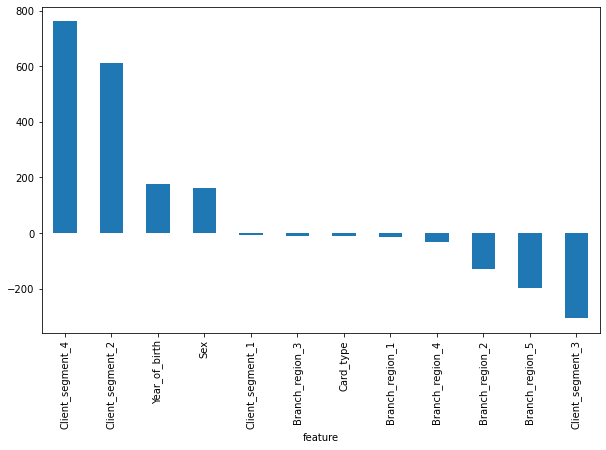

In [113]:
featureImportance = pd.DataFrame({"feature": data_ml_period.drop('Policy_validity_period',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [114]:
from sklearn.linear_model import LassoCV

In [115]:
lasso = LassoCV(eps=0.01)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)
print_metrics(y_test, pred_lasso)

MAE: 1408.1460712813061
RMSE: 2166.675514212334
R2: 0.01857335488672507
MAPE: 27.68357765304384


In [116]:
import xgboost as xgb

In [117]:
# Объявляем модель

xgb_r = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=2,
    n_estimators=200,
    objective="reg:linear",
    n_jobs = 2,
    random_state = 42
)

# Фитим модель
xgb_r.fit(X_train, y_train)

pred = xgb_r.predict(X_test)

print_metrics(y_test, pred)

[14:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 1444.006496687603
RMSE: 2152.0811955846075
R2: 0.031750236893832606
MAPE: 28.271201964778026


Из данных признаков при помощи алгоритмов машинного обучения получен прогноз низкого качества.

### Выводы

#### Подтверждение или опровержение гипотез

* У клиентов, использующих кредитные карты, меньше срок страхования и премия. 

Верно обратное. Средне значение премии среди владельце кредитных карт выше на 9% больше и срок полиса больше на 2%.

* Среди филиалов есть такие, в которых у клиентов, в среднем, наибольший срок действия полиса и размер премии.

У филиала в регионе RBA самые лучшие показатели. Кроме того, в сравнении с остальными филиалами, в нем обслуживаются больше всего клиентов.

* Клиенты женского пола чаще приобретают семейные планы.

Отчасти это предположение подтвердилось.
При сравнении с клиентами мужского пола женщины приобретают полисы по следующим планам:

    Индивидуальный серебряный план - больше на 35 % 
    Семейный серебряный план - больше на 22 %
    Индивидуальный золотой план - больше на 10 %
    Семейный расширеный серебряный план - больше на 71 %
    Семейный золотой план - больше на 7 %
    Семейный расширенный золотой план - больше на 24 % 

    Индивидуальный платиновый план - меньше на 21 %
    Семейный платиновый план - меньше на 6 %
    Семейный расширенный платиновый план - меньше на 9 %

* Есть клиентские сегменты, в среднем, с наибольший сроком действия полиса и размером премии.

Сегменты Mass Affluent и Affluent, в среднем, имеют самый большой показатель премии и длительности полиса.

* Клиенты определенного возраста владеют, в среднем, полисом с наибольшим сроком действия и размером премии.

Клиенты 1979 года +/- 2 года имеют самые высокие показатели размера премии.

* При помощи машинного обучения на данном наборе признаков можно прогнозировать период действия полиса и премию.

Качество прогнозирования на данных признаках неудовлетворительное.

### Практическая ценность исследования

Есть смысл при целевой рекламе дать больше акцента на аудиторию 1979 г.р., на сегментах Mass Affluent и Affluent (в случае, если сегмент может быть определен заранее) и владельцах кредитных карт.

Рекламу семейных планов можно адаптировать больше под аудиторию женского пола.

### Что можно сделать еще

* Исследовать данные с точки зрения выручки по различным срезам.
* Исследовать аномалии. Возможно, скорректировать их и еще раз провести анализ.
* Сделать кластеризацию данных.